In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import nltk
import enchant
import pickle as pkl
from joblib import dump, load
import re
from collections import Counter
from nltk.corpus import stopwords
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import FunctionTransformer
from nltk.tokenize import TweetTokenizer
from sklearn.metrics import f1_score, precision_score, recall_score, confusion_matrix, ConfusionMatrixDisplay
from Limpieza import Limpieza


In [2]:

# Cargar los datos en un DataFrame de pandas
movies_df = pd.read_csv('./data/MovieReviews.csv', sep=',', encoding="utf-8", index_col=0)

# Función para tokenizar los tweets
"""
nltk.download('punkt')
def tokenizer(text):
    tt = TweetTokenizer()
    return tt.tokenize(text)

"""

# Descargando las stopwords
nltk.download('punkt')
nltk.download('stopwords')
stop_words_complete = list(stopwords.words('spanish')) + list(stopwords.words('english'))

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Esteban\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Esteban\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [3]:

# Crear el pipeline
text_pipeline = Pipeline([
    ('preprocessing', Limpieza() ),
    ('vectorizer', CountVectorizer(tokenizer=nltk.TweetTokenizer().tokenize, stop_words=stop_words_complete, lowercase=True)),
    ('classifier', RandomForestClassifier(random_state=2, n_estimators=200, min_samples_split=4, max_depth=3, criterion='entropy'))
])


In [4]:
# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(movies_df['review_es'], movies_df['sentimiento'], test_size=0.2, random_state=42)

In [5]:
# Ajustar el pipeline a los datos de entrenamiento
text_pipeline.fit(X_train, y_train)

Fit...
Transform...
Preprocessing text...


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Esteban\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Termino


c:\Users\Esteban\Documents\proyectos-semestre-septimo\inteligencia_negocios\app-peliculas\env\Lib\site-packages\sklearn\feature_extraction\text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


Pipeline(steps=[('preprocessing', Limpieza()),
                ('vectorizer',
                 CountVectorizer(stop_words=['de', 'la', 'que', 'el', 'en', 'y',
                                             'a', 'los', 'del', 'se', 'las',
                                             'por', 'un', 'para', 'con', 'no',
                                             'una', 'su', 'al', 'lo', 'como',
                                             'más', 'pero', 'sus', 'le', 'ya',
                                             'o', 'este', 'sí', 'porque', ...],
                                 tokenizer=<bound method TweetTokenizer.tokenize of <nltk.tokenize.casual.TweetTokenizer object at 0x00000106A5279850>>)),
                ('classifier',
                 RandomForestClassifier(criterion='entropy', max_depth=3,
                                        min_samples_split=4, n_estimators=200,
                                        random_state=2))])

In [9]:
pipeline_path =  "../api-rest/assets/pipeline_peliculas.joblib"
dump(text_pipeline, pipeline_path)

['../api-rest/assets/pipeline_peliculas.joblib']

In [10]:
pipeline_path =  "../api-rest/assets/pipeline_peliculas.pkl"
with open(pipeline_path, 'wb') as file:
    pkl.dump(text_pipeline, file)

In [6]:
# Generación de predicciones para entrenamiento y test para el cálculo de errores
preds_train = text_pipeline.predict(X_train)
preds_test = text_pipeline.predict(X_test)

Transform...
Preprocessing text...


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Esteban\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Termino
Transform...
Preprocessing text...


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Esteban\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Termino


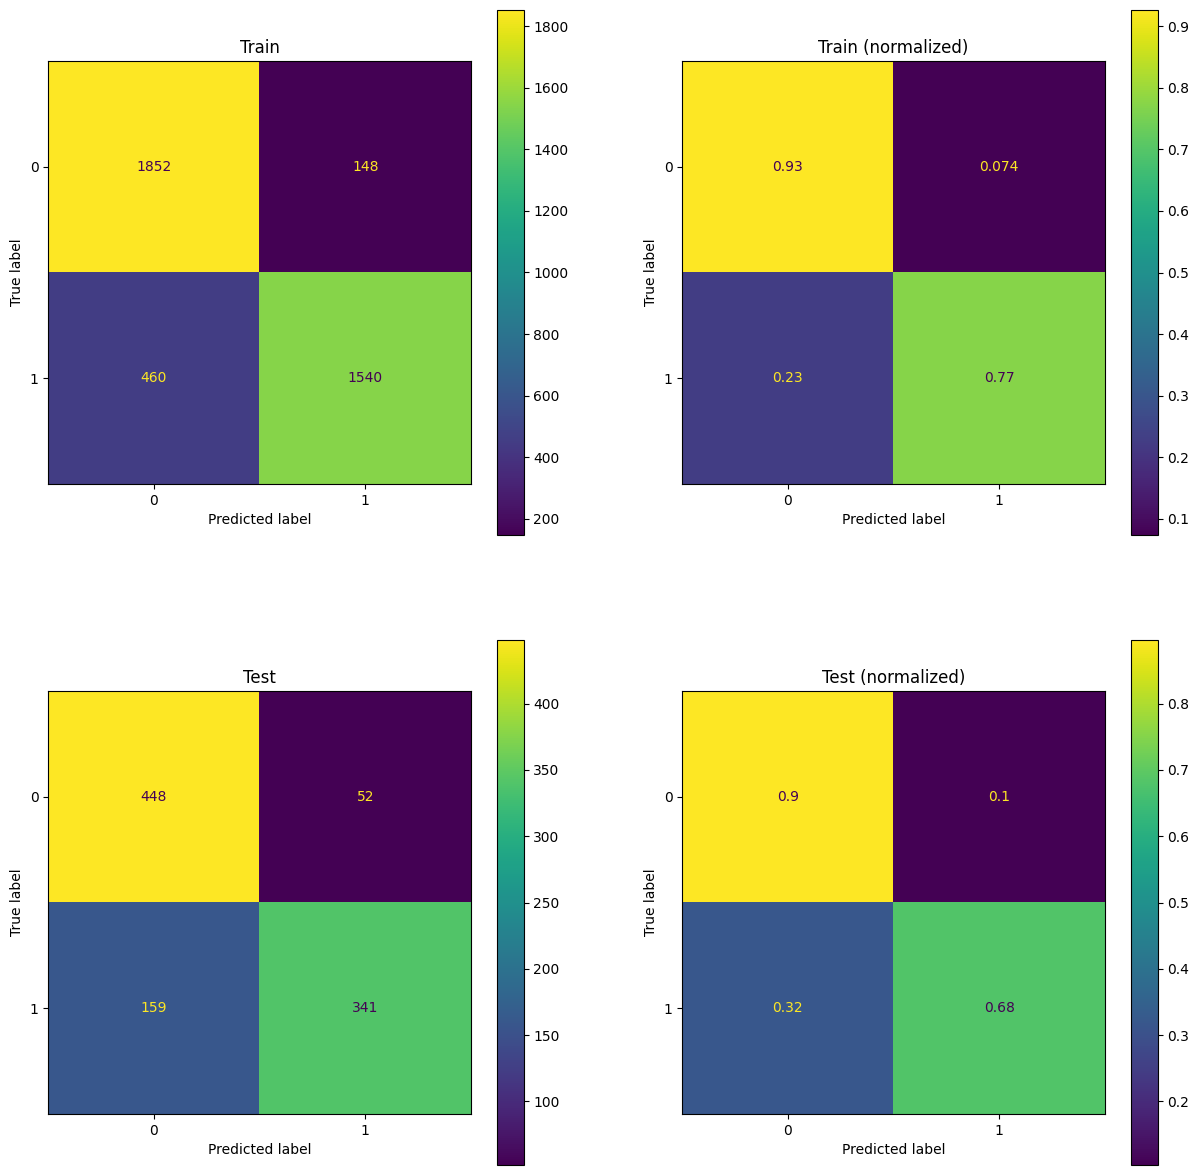

In [7]:
cm_train = confusion_matrix(y_train, preds_train, labels=('positivo', 'negativo'))
cm_train_norm = confusion_matrix(y_train, preds_train, labels=('positivo', 'negativo'), normalize = 'true')
cm_test = confusion_matrix(y_test, preds_test, labels=('positivo', 'negativo'))
cm_test_norm = confusion_matrix(y_test, preds_test, labels=('positivo', 'negativo'), normalize = 'true')

fig, axs = plt.subplots(2, 2, figsize = (15, 15))

ConfusionMatrixDisplay(confusion_matrix = cm_train).plot(ax=axs[0][0])
ConfusionMatrixDisplay(confusion_matrix = cm_train_norm).plot(ax=axs[0][1])
ConfusionMatrixDisplay(confusion_matrix = cm_test).plot(ax=axs[1][0])
ConfusionMatrixDisplay(confusion_matrix = cm_test_norm).plot(ax=axs[1][1])

axs[0][0].set_title('Train')
axs[0][1].set_title('Train (normalized)')
axs[1][0].set_title('Test')
axs[1][1].set_title('Test (normalized)')

plt.show()

In [8]:
pd.DataFrame([
    {
        'Train': precision_score(y_train, preds_train, pos_label = 'positivo'),
        'Test': precision_score(y_test, preds_test, pos_label = 'positivo')
    },
    {
        'Train':recall_score(y_train, preds_train, pos_label = 'positivo'),
        'Test': recall_score(y_test, preds_test, pos_label = 'positivo')
    },
    {
        'Train': f1_score(y_train, preds_train, pos_label = 'positivo'),
        'Test': f1_score(y_test, preds_test, pos_label = 'positivo')
    }
], index = ['Precision', 'Recall', 'F1'])

,Train,Test
Precision,0.801038,0.738056
Recall,0.926000,0.896000
F1,0.858998,0.809395
